Exporlatory Data Analysis with Super Store Data

In [9]:
#Packages 

#Analytics 
import numpy as np
import pandas as pd 

#Graphical
import matplotlib.pyplot as plt
import seaborn as sns 



In [3]:
#Load Datafile 
df = pd.read_csv("SampleSuperstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#

In [5]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599
std,623.245124,2.225110,0.206452,234.260115
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


We'll need to create additional columns based on the information provided to get a better sense of the profits, costs, and margin, 

Cost = Sales - Profit
Gross_Margin = (Sales - Cost )/ Sales * 100 -> percentage%  #similar to contribution margin 
Break_even = Cost  / Gross_Margin%
Net_Sales = Sales - Discount
Sales per qty = Sales / Quantity  
Profit per qty = Profit / qty  
Cost per Qty = Cost / qty 

*Reminder calculations are floats with the excption of Gross-Margin which is in percentage 

In [6]:
df['Cost'] = df['Sales'] - df['Profit']
df['Gross-Margin%'] = (df['Sales'] - df['Cost']) / df['Sales']*100   
df['Break-Even'] = df['Cost'] / df['Gross-Margin%']
df['Net-Sales'] = df['Sales'] - df['Discount']
df['Sales-per-Qty'] = df['Sales'] / df['Quantity']
df['Profit-per-Qty'] = df['Profit'] / df['Quantity']
df['Cost-per-Qty'] = df['Cost'] / df['Quantity']

In [7]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,16.00,13.752900,261.9600,130.9800,20.9568,110.0232
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,30.00,17.078600,731.9400,243.9800,73.1940,170.7860
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,47.00,0.164864,14.6200,7.3100,3.4357,3.8743
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-40.00,-33.515212,957.1275,191.5155,-76.6062,268.1217
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,11.25,1.764587,22.1680,11.1840,1.2582,9.9258


In [8]:
df[['Sales','Quantity','Discount','Profit', 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty','Cost-per-Qty']].describe()

,Sales,Quantity,Discount,Profit,Cost,Gross-Margin%,Break-Even,Net-Sales,Sales-per-Qty,Profit-per-Qty,Cost-per-Qty
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.857901,3.789574,0.156203,28.656599,201.201302,12.030951,inf,229.701698,60.919469,7.799175,53.120294
std,623.245124,2.225110,0.206452,234.260115,550.839360,46.675214,NaN,623.250978,142.927423,56.074952,122.251351
min,0.444000,1.000000,0.000000,-6599.978000,0.554400,-275.000000,-3246.350400,-0.356000,0.336000,-1319.995600,0.544500
25%,17.280000,2.000000,0.000000,1.728750,12.688200,7.500000,0.135334,17.140000,5.470000,0.722800,3.473600
50%,54.490000,3.000000,0.200000,8.666500,41.664000,27.000000,0.673518,54.324000,16.270000,2.767000,12.933600
75%,209.940000,5.000000,0.200000,29.364000,182.226300,36.250000,4.846739,209.862000,63.940000,8.703200,54.522000
max,22638.480000,14.000000,0.800000,8399.976000,24449.558400,50.000000,inf,22637.980000,3773.080000,1679.995200,4074.926400


As a note to the above statistic summary the break even column has "NaN" & inf as a value due to the Cost being divided by a percentage. In reality there are arent any "Nan" or "inf" values in the column


From the Prespective of a Business Manager, the below are a few questions worth asking based on the dataset 
- Preferred shipping method, for opportunity for cost savings with a Logistics Carrier 
- Which Segment of Customers bring in most profit 
- Which regions are the most profitable and least profitable to know how best to improve Profits through ads or cut back to maintain a profit
- Profit & Loss by Item Category and or Sub-category 
- Are Discounts worth the cost ? 

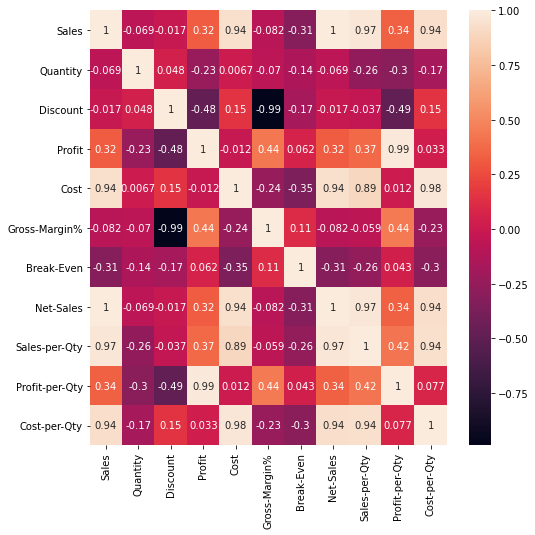

In [14]:
#Are Discounts worth the cost? we'll use a correlation matric to determine this 
df_Corr = df[['Sales','Quantity','Discount','Profit', 'Cost', 'Gross-Margin%', 'Break-Even', 'Net-Sales', 'Sales-per-Qty', 'Profit-per-Qty','Cost-per-Qty']].corr()
corrMatrix = df_Corr.corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Based on the Correlation Matrix above we can see that there is a negative relationship between discount and profits suggesting that discounts hurt profits